In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

In [8]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()  

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
car.describe()

In [13]:
le = LabelEncoder()
car.CarName = le.fit_transform(car.CarName)
car.fueltype = le.fit_transform(car.fueltype)
car.aspiration = le.fit_transform(car.aspiration)
car.doornumber = le.fit_transform(car.doornumber)
car.carbody = le.fit_transform(car.carbody)
car.drivewheel = le.fit_transform(car.drivewheel)
car.enginelocation = le.fit_transform(car.enginelocation)
car.enginetype = le.fit_transform(car.enginetype)
car.cylindernumber = le.fit_transform(car.cylindernumber)
car.fuelsystem = le.fit_transform(car.fuelsystem)


In [14]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
car.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,77.209756,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,41.014583,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,44.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,80.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,115.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,146.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [16]:
car.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,-0.033930,0.204898,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.153982,0.123845,0.188598,-0.181775,0.101730,-0.092131,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.069594,0.041529,-0.054451,-0.241829,-0.984356,0.163926,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.020742,0.015519,-0.119258,0.011082,-0.177888,0.126947,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816


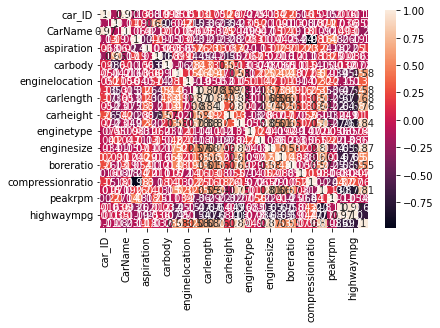

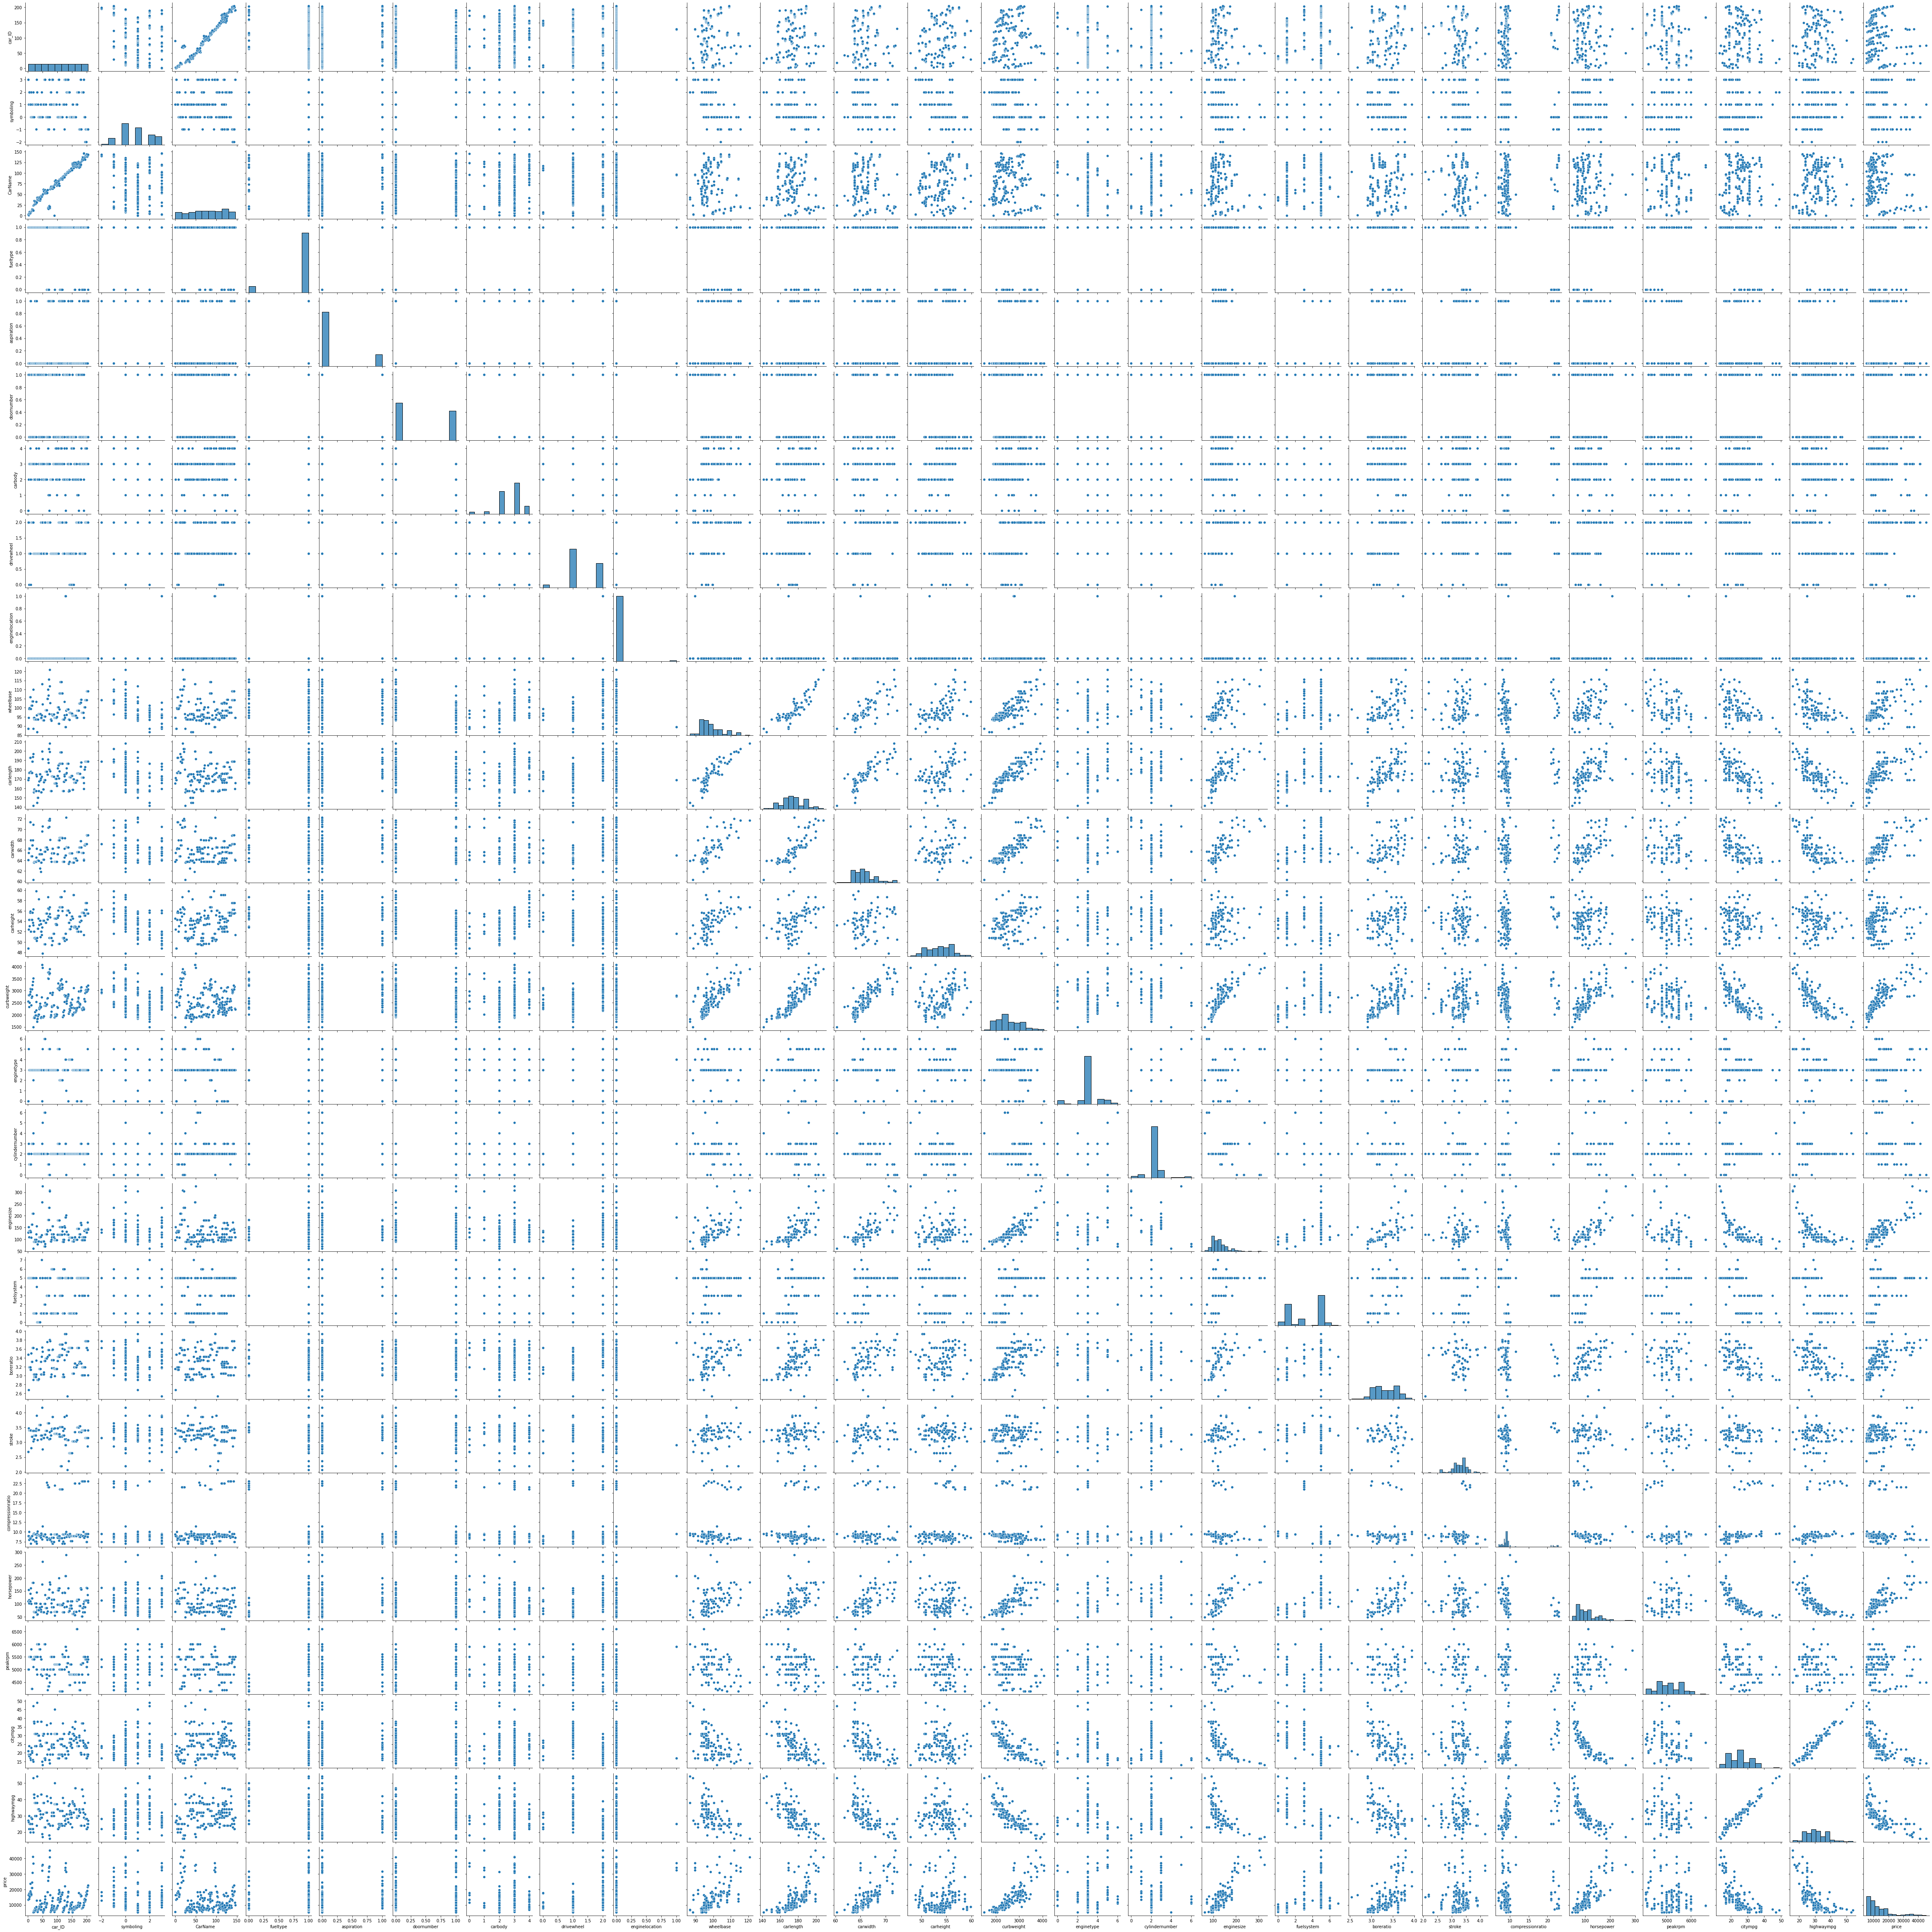

In [18]:
sns.heatmap(car.corr(), annot=True)
sns.pairplot(car)

In [20]:
scale = MinMaxScaler()
car_norm = pd.DataFrame(scale.fit_transform(car), columns=car.columns, index = car.car_ID)
car_norm.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.0,0.013699,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.207959
2,0.004902,1.0,0.020548,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,0.282558
3,0.009804,0.6,0.006849,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,0.282558
4,0.014706,0.8,0.027397,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,0.219254
5,0.019608,0.8,0.034247,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,0.306142


In [21]:
car_norm.describe()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.500000,0.566829,0.528834,0.902439,0.180488,0.439024,0.653659,0.663415,0.014634,0.354419,...,0.248707,0.464808,0.564111,0.564483,0.196409,0.233821,0.398009,0.339431,0.388190,0.202540
std,0.290797,0.249061,0.280922,0.297446,0.385535,0.497483,0.214770,0.278085,0.120377,0.175562,...,0.157142,0.287601,0.193460,0.149332,0.248253,0.164767,0.194688,0.181726,0.181222,0.198323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.400000,0.301370,1.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.230321,...,0.135849,0.142857,0.435714,0.495238,0.100000,0.091667,0.265306,0.166667,0.236842,0.066283
50%,0.500000,0.600000,0.547945,1.000000,0.000000,0.000000,0.750000,0.500000,0.000000,0.303207,...,0.222642,0.714286,0.550000,0.580952,0.125000,0.195833,0.428571,0.305556,0.368421,0.128519
75%,0.750000,0.800000,0.787671,1.000000,0.000000,1.000000,0.750000,1.000000,0.000000,0.460641,...,0.301887,0.714286,0.742857,0.638095,0.150000,0.283333,0.551020,0.472222,0.473684,0.282632
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
funcao = ('price ~ symboling + fueltype + aspiration + doornumber + carbody + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight + enginetype + cylindernumber + enginesize + fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg')
modelo = smf.ols (formula=funcao, data=car_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     57.84
Date:                Fri, 19 May 2023   Prob (F-statistic):           5.74e-71
Time:                        23:34:02   Log-Likelihood:                 258.81
No. Observations:                 205   AIC:                            -469.6
Df Residuals:                     181   BIC:                            -389.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1298      0.201      0.646      0.519      -0.267       0.526
symboling            0.0192      0.034      0.558      0.577      -0.049       0.087
fueltype            -0.2276      0.169     -1.348      0.179      -0.561       0.105
aspiration           0.0052      0.024      0.218      0.828      -0.042       0.053
doornumber          -0.0168      0.017     -0.972      0.333      -0.051       0.017
carbody             -0.0777      0.040     -1.959      0.052      -0.156       0.001
drivewheel           0.0594      0.029      2.024      0.044       0.001       0.117
enginelocation       0.2557      0.056      4.570      0.000       0.145       0.366
wheelbase            0.1122      0.096      1.170      0.243      -0.077       0.301
carlength           -0.0537      0.095     -0.565      0.573      -0.241       0.134
carwidth             0.2040      0.085      2.391      0.018       0.036       0.372
carheight            0.0555      0.044      1.266      0.207      -0.031       0.142
curbweight           0.1515      0.110      1.373      0.171      -0.066       0.369
enginetype           0.0315      0.037      0.854      0.394      -0.041       0.104
cylindernumber       0.0139      0.058      0.241      0.810      -0.100       0.128
enginesize           0.6621      0.120      5.505      0.000       0.425       0.899
fuelsystem          -0.0284      0.028     -1.032      0.303      -0.083       0.026
boreratio           -0.0951      0.040     -2.380      0.018      -0.174      -0.016
stroke              -0.1464      0.043     -3.406      0.001      -0.231      -0.062
compressionratio    -0.2170      0.194     -1.120      0.264      -0.599       0.165
horsepower           0.1383      0.121      1.139      0.256      -0.101       0.378
peakrpm              0.1262      0.043      2.945      0.004       0.042       0.211
citympg             -0.1133      0.161     -0.704      0.482      -0.431       0.204
highwaympg           0.1164      0.150      0.777      0.438      -0.179       0.412
==============================================================================
Omnibus:                       43.308   Durbin-Watson:                   0.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.520
Skew:                           0.780   Prob(JB):                     3.78e-35
Kurtosis:                       7.016   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
funcao = ('price ~ fueltype + doornumber + carbody + drivewheel + enginelocation + wheelbase +  carwidth + carheight + curbweight + enginetype + enginesize + fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg')
modelo = smf.ols (formula=funcao, data=car_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     71.25
Date:                Fri, 19 May 2023   Prob (F-statistic):           1.79e-74
Time:                        23:36:14   Log-Likelihood:                 258.41
No. Observations:                 205   AIC:                            -476.8
Df Residuals:                     185   BIC:                            -410.4
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1665      0.164      1.016      0.311      -0.157       0.490
fueltype            -0.2490      0.131     -1.895      0.060      -0.508       0.010
doornumber          -0.0115      0.015     -0.746      0.457      -0.042       0.019
carbody             -0.0835      0.038     -2.217      0.028      -0.158      -0.009
drivewheel           0.0588      0.028      2.084      0.039       0.003       0.114
enginelocation       0.2571      0.055      4.658      0.000       0.148       0.366
wheelbase            0.0872      0.084      1.039      0.300      -0.078       0.253
carwidth             0.1907      0.072      2.631      0.009       0.048       0.334
carheight            0.0463      0.041      1.140      0.256      -0.034       0.127
curbweight           0.1483      0.105      1.416      0.158      -0.058       0.355
enginetype           0.0366      0.033      1.118      0.265      -0.028       0.101
enginesize           0.6369      0.094      6.790      0.000       0.452       0.822
fuelsystem          -0.0298      0.026     -1.143      0.255      -0.081       0.022
boreratio           -0.0992      0.039     -2.539      0.012      -0.176      -0.022
stroke              -0.1445      0.042     -3.479      0.001      -0.226      -0.063
compressionratio    -0.2374      0.155     -1.532      0.127      -0.543       0.068
horsepower           0.1563      0.095      1.653      0.100      -0.030       0.343
peakrpm              0.1258      0.041      3.062      0.003       0.045       0.207
citympg             -0.1025      0.144     -0.712      0.477      -0.386       0.182
highwaympg           0.1097      0.141      0.780      0.436      -0.168       0.387
==============================================================================
Omnibus:                       40.077   Durbin-Watson:                   0.882
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.915
Skew:                           0.759   Prob(JB):                     1.01e-28
Kurtosis:                       6.576   Cond. No.                         118.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
funcao = ('price ~ fueltype  + carbody + drivewheel + enginelocation + wheelbase +  carwidth + carheight + curbweight + enginetype + enginesize + fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm  + highwaympg')
modelo = smf.ols (formula=funcao, data=car_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     79.89
Date:                Fri, 19 May 2023   Prob (F-statistic):           4.09e-76
Time:                        23:37:54   Log-Likelihood:                 257.73
No. Observations:                 205   AIC:                            -479.5
Df Residuals:                     187   BIC:                            -419.7
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1218      0.158      0.770      0.443      -0.190       0.434
fueltype            -0.2332      0.130     -1.790      0.075      -0.490       0.024
carbody             -0.0690      0.033     -2.106      0.037      -0.134      -0.004
drivewheel           0.0568      0.028      2.048      0.042       0.002       0.112
enginelocation       0.2698      0.054      5.010      0.000       0.164       0.376
wheelbase            0.0891      0.082      1.082      0.280      -0.073       0.251
carwidth             0.1964      0.072      2.729      0.007       0.054       0.338
carheight            0.0477      0.041      1.175      0.241      -0.032       0.128
curbweight           0.1610      0.104      1.550      0.123      -0.044       0.366
enginetype           0.0378      0.033      1.163      0.246      -0.026       0.102
enginesize           0.6185      0.091      6.776      0.000       0.438       0.799
fuelsystem          -0.0259      0.026     -1.013      0.313      -0.076       0.025
boreratio           -0.0948      0.039     -2.444      0.015      -0.171      -0.018
stroke              -0.1392      0.041     -3.397      0.001      -0.220      -0.058
compressionratio    -0.2273      0.154     -1.474      0.142      -0.531       0.077
horsepower           0.1628      0.092      1.778      0.077      -0.018       0.343
peakrpm              0.1221      0.041      2.988      0.003       0.041       0.203
highwaympg           0.0265      0.071      0.373      0.710      -0.114       0.166
==============================================================================
Omnibus:                       38.336   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.028
Skew:                           0.744   Prob(JB):                     6.38e-26
Kurtosis:                       6.372   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
funcao = ('price ~ fueltype  + carbody + drivewheel + enginelocation +  carheight +  enginesize + boreratio + stroke + compressionratio + horsepower + peakrpm -1')
modelo = smf.ols (formula=funcao, data=car_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              227.6
Date:                Fri, 19 May 2023   Prob (F-statistic):                   1.78e-104
Time:                        23:42:18   Log-Likelihood:                          237.59
No. Observations:                 205   AIC:                                     -453.2
Df Residuals:                     194   BIC:                                     -416.6
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.1395      0.033     -4.276      0.000      -0.204      -0.075
carbody             -0.0386      0.033     -1.176      0.241      -0.103       0.026
drivewheel           0.0800      0.026      3.129      0.002       0.030       0.130
enginelocation       0.1420      0.052      2.711      0.007       0.039       0.245
carheight            0.1397      0.035      3.953      0.000       0.070       0.209
enginesize           0.8390      0.079     10.666      0.000       0.684       0.994
boreratio           -0.0344      0.039     -0.872      0.384      -0.112       0.043
stroke              -0.1111      0.038     -2.961      0.003      -0.185      -0.037
compressionratio    -0.0655      0.045     -1.458      0.147      -0.154       0.023
horsepower           0.2679      0.079      3.404      0.001       0.113       0.423
peakrpm              0.1330      0.042      3.146      0.002       0.050       0.216
==============================================================================
Omnibus:                       15.773   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.208
Skew:                           0.345   Prob(JB):                     1.01e-07
Kurtosis:                       4.815   Cond. No.                         34.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
funcao = ('price ~ fueltype  + drivewheel + enginelocation +  carheight +  enginesize + stroke + compressionratio + horsepower + peakrpm -1')
modelo = smf.ols (formula=funcao, data=car_norm).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.927
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                              277.5
Date:                Fri, 19 May 2023   Prob (F-statistic):                   2.00e-106
Time:                        23:43:39   Log-Likelihood:                          236.38
No. Observations:                 205   AIC:                                     -454.8
Df Residuals:                     196   BIC:                                     -424.9
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
fueltype            -0.1626      0.028     -5.732      0.000      -0.219      -0.107
drivewheel           0.0785      0.024      3.219      0.002       0.030       0.127
enginelocation       0.1560      0.050      3.110      0.002       0.057       0.255
carheight            0.1093      0.028      3.862      0.000       0.054       0.165
enginesize           0.8424      0.079     10.708      0.000       0.687       0.998
stroke              -0.1105      0.037     -2.947      0.004      -0.184      -0.037
compressionratio    -0.0925      0.041     -2.244      0.026      -0.174      -0.011
horsepower           0.2407      0.074      3.232      0.001       0.094       0.388
peakrpm              0.1393      0.040      3.490      0.001       0.061       0.218
==============================================================================
Omnibus:                       15.304   Durbin-Watson:                   0.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.466
Skew:                           0.356   Prob(JB):                     4.00e-07
Kurtosis:                       4.716   Cond. No.                         28.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
x = car_norm[['fueltype', 'drivewheel', 'enginelocation', 'carheight', 'enginesize', 'stroke', 'compressionratio', 'horsepower', 'peakrpm']]
y = car_norm[['price']]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1,  random_state=0)
lr = LinearRegression()
lr.fit(x_train, y_train)
r_quadrado = lr.score(x,y)
r_quadrado

0.8523682828222001

In [43]:
y_pred_trai = lr.predict(x_train)
y_pred_test = lr.predict(x_test)
print('R2 treino: %.2f' % metrics.r2_score(y_train, y_pred_trai))
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_trai))
print('MSE: ', metrics.mean_squared_error(y_train, y_pred_trai))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_pred_trai)))

R2 treino: 0.86
MAE:  0.05572551291033024
MSE:  0.005855395300398081
RMSE:  0.0765205547575165
